## Hypothesis Testing on Avg. Daily Miles by Uber Driver (Pre & Post Marketing campaign) for LAX and SFO

Name : Karishma Saikia

### BACKGROUND
There are 2 data sets containing information about Uber rides for two cities-SFO & LAX.

**Column list**

Date -On which date the ride was taken.<br>
Avg. Daily Miles Driven Per Hour - by Uber driver.<br>
Marketing_Campaign - A binary field that is set to either 1 for when the marketing campaign was done or 0 for when there was no marketing campaign.

### PROBLEM STATEMENT

Did the average daily miles per hour by Uber driver increased after marketing campaign? 

In [18]:
#Imported the necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams

import seaborn as sns
rcParams['figure.figsize'] = 23, 10
plt.rcParams.update({'font.size':24});

In [19]:
#Load the required datasets
raw_data_LA=pd.read_csv('LAXdata.csv')
raw_data_SF=pd.read_csv('SFOdata.csv')

In [20]:
raw_data_LA.head(2);
raw_data_SF.head(2)

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2018,39.816706,0
1,09/15/2018,73.076189,0


### DATA CLEANING

In [21]:
raw_data_SF = raw_data_SF.rename(columns={'LAX - Avg. Daily Miles Driven Per Hour':'SFO - Avg. Daily Miles Driven Per Hour'})

In [22]:
#CHecking the data types
raw_data_LA.dtypes;
raw_data_SF.dtypes;

#Checking for NULL values
raw_data_LA.count();
raw_data_SF.count();

#Checking for uniqueness
raw_data_LA['Marketing_Campaign'].value_counts();
raw_data_SF['Marketing_Campaign'].value_counts();

**Observations from above**

- Both the datasets are pretty clean with equal number of observations of 109 and no NULL values
- Successful & Unsuccessful Marketing campaigns for both the datasets are same

In [23]:
raw_data_LA['LAX - Avg. Daily Miles Driven Per Hour'].describe();

[array([ 73.10865171, -25.99392214]), array([157.0443039, 270.1956169])]

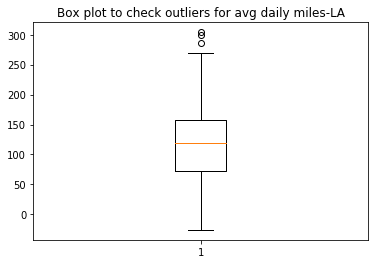

In [7]:
plt.title("Box plot to check outliers for avg daily miles-LA")
x_plot=plt.boxplot(raw_data_LA['LAX - Avg. Daily Miles Driven Per Hour'])
[item.get_ydata() for item in x_plot['whiskers']]

In [8]:
#Filtering out the outliers

LA_df= raw_data_LA.loc[((raw_data_LA['LAX - Avg. Daily Miles Driven Per Hour'] < 270) & 
                        (raw_data_LA['LAX - Avg. Daily Miles Driven Per Hour'] >= 0 ))]

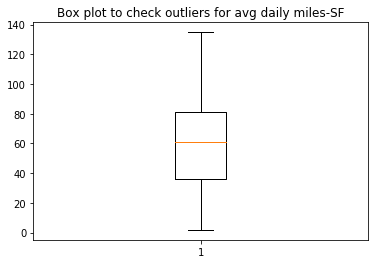

In [9]:
raw_data_SF['SFO - Avg. Daily Miles Driven Per Hour'].describe();
plt.boxplot(raw_data_SF['SFO - Avg. Daily Miles Driven Per Hour'])
plt.title("Box plot to check outliers for avg daily miles-SF")

SF_df=raw_data_SF.copy()

### Test Set-Up

* The Null Hypothesis is that the average miles driven per hour by Uber driver when marketing campaign was deployed is same as the miles driven **when the marketing campaign was not deployed**.

* The Alternate Hypothesis is that the average miles driven per hour by Uber driver when marketing campaign was deployed is greater than the miles driven **when the marketing campaign was not deployed**.

* The p-value will be set to .05

### Test for LA

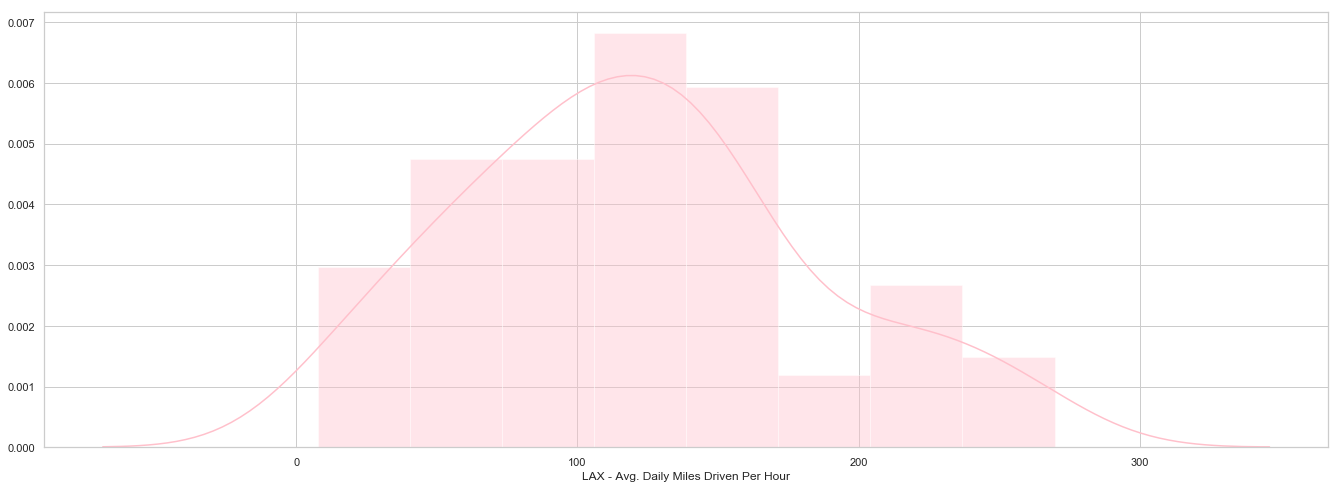

In [24]:
#Distribution plot for LAX - Avg. Daily Miles Driven Per Hour
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(LA_df['LAX - Avg. Daily Miles Driven Per Hour'], bins = 8, color='pink')

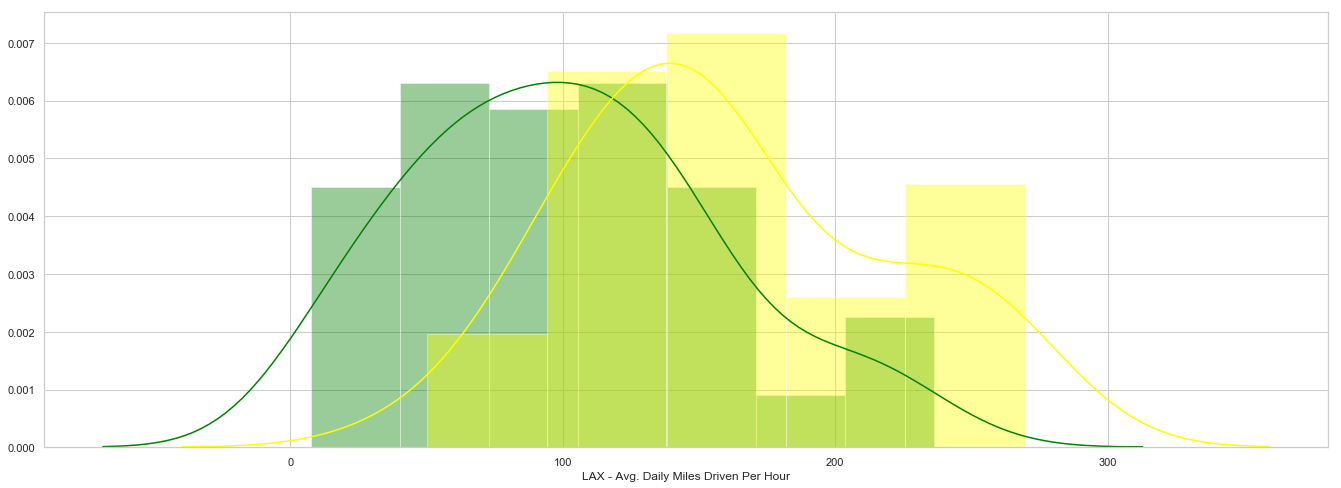

In [25]:
data0 = LA_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LA_df['Marketing_Campaign']==0]
data1 = LA_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LA_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(data0, hist=True, color='green')
ax = sns.distplot(data1, hist=True, color='yellow')

### Analysis of Variance test

In [26]:

from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=26.008, p=0.000
Different distributions (reject H0)


**Since p < 0.05, we reject the NULL hypothesis **

### Test for SF

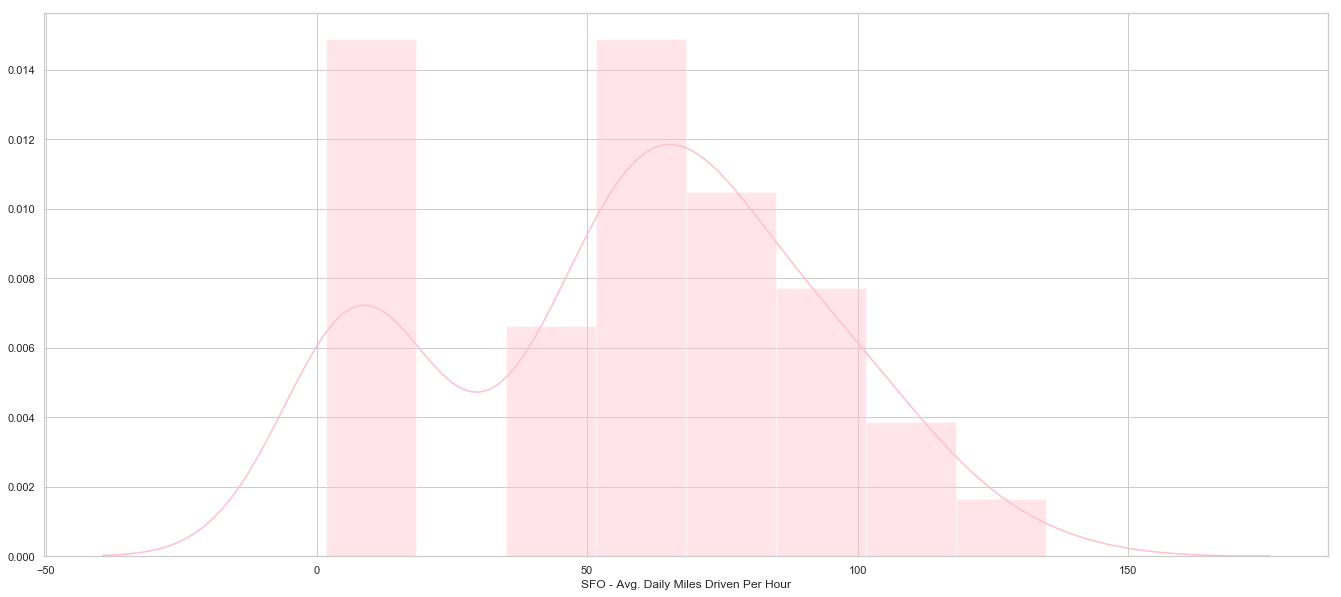

In [27]:
#Distribution plot for SFO - Avg. Daily Miles Driven Per Hour
sns.set_style('whitegrid')
# plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(SF_df['SFO - Avg. Daily Miles Driven Per Hour'], bins = 8, color='pink')

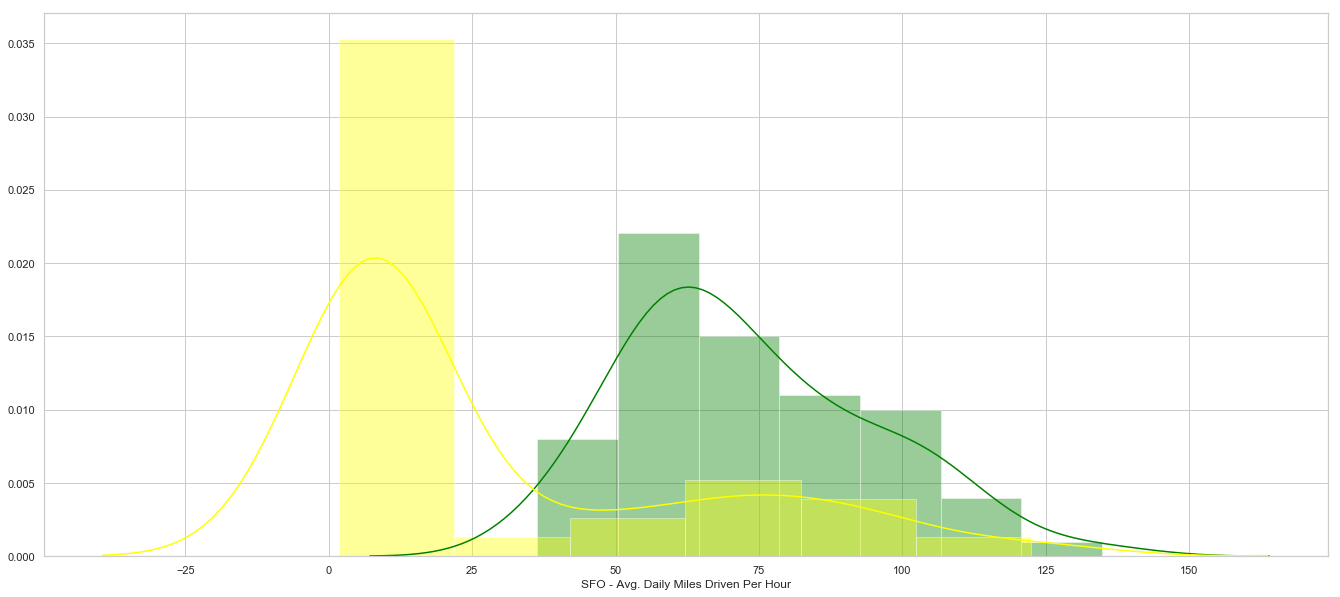

In [28]:
data0_s = SF_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SF_df['Marketing_Campaign']==0]
data1_s = SF_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SF_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
sns.set(style='whitegrid')
ax = sns.distplot(data0_s, hist=True, color='green')
ax = sns.distplot(data1_s, hist=True, color='yellow')

### Analysis of Variance test

In [29]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#compare samples
stat, p = f_oneway(data0_s, data1_s)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=74.124, p=0.000
Different distributions (reject H0)


**Since p < 0.05, we reject the NULL hypothesis **

### RESULTS

**For both SFO and LAX, the average miles driven per hour by Uber driver when marketing campaign was deployed is greater than the miles driven when the marketing campaign was not deployed ** 

**Factors that might affect the validity of the Study**

- If the number of drivers increases, then the average miles driven per Uber driver will decrease and the above study might not be valid.<br>
<br>
- The campaigns are customer oriented. However, these campaigns should not impact the drivers earning because the number of Uber drivers will reduce and average miles might increase.<br>
<br>
- Some other external factors like<br>
 (i).More preferable alternate modes of commutations.<br> 
 (ii).More attractive promotions my competitors.<br>
 (iii).Any incident that negatively impacts Uber's credibility <br>